In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle

In [ ]:
dataframe = pd.read_csv("/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv")

In [ ]:
dataframe

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
dataframe.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
dataframe.drop(["isFlaggedFraud"], axis=1, inplace=True)

In [ ]:
dataframe.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1


In [ ]:
plt.style.use("ggplot")
warnings.filterwarnings("ignore")

In [ ]:
dataframe["isFraud"].value_counts()

,count
isFraud,
0,6354407
1,8213


In [ ]:
dataframe.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [ ]:
legitimate = dataframe[dataframe["isFraud"]==0]

In [ ]:
fraud = dataframe[dataframe["isFraud"]==1]

In [ ]:
legitimate = legitimate.sample(n=8213)

In [ ]:
legitimate.shape, fraud.shape

((8213, 10), (8213, 10))

In [ ]:
onlinefraud = pd.concat([legitimate, fraud], axis=0)

In [ ]:
onlinefraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
4122256,302,CASH_OUT,168238.91,C1643761680,0.00,0.00,C1343083500,419639.56,587878.46,0
4528255,326,CASH_IN,290808.14,C240820367,3129.00,293937.14,C892707546,0.00,0.00,0
491841,19,CASH_OUT,16697.18,C1954770472,367149.55,350452.37,C1661673055,574217.29,600060.18,0
4694820,331,CASH_OUT,229854.47,C494955485,259996.00,30141.53,C1299911785,696069.39,925923.86,0
4979657,352,PAYMENT,7564.20,C1601028281,5046.00,0.00,M1483394808,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [ ]:
onlinefraud.head()
onlinefraud.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1


In [ ]:
onlinefraud["isFraud"].value_counts()

,count
isFraud,
0,8213
1,8213


In [ ]:
onlinefraud.to_csv('balanced_dataset.csv', index=False, encoding='utf-8')

In [ ]:
correlation = dataframe.corr(numeric_only=True)
correlation

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


<Axes: >

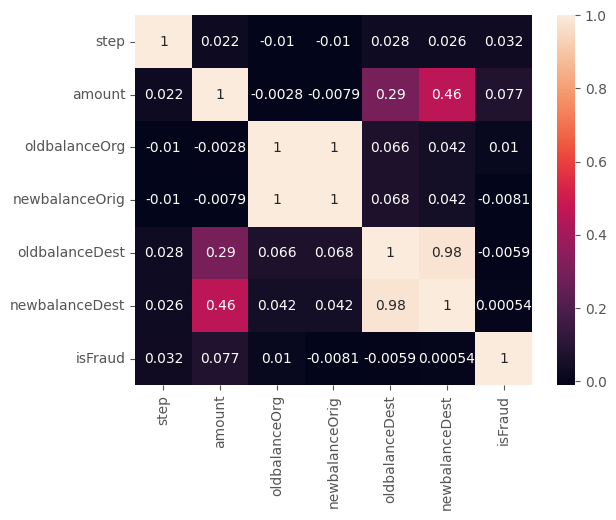

In [ ]:
sns.heatmap(correlation, annot=True)

<Axes: xlabel='step', ylabel='Count'>

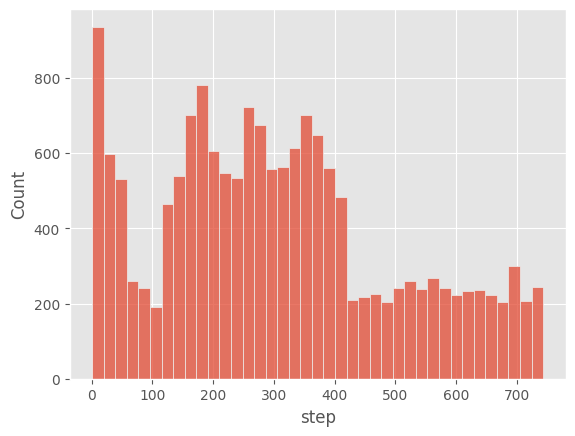

In [ ]:
sns.histplot(data = onlinefraud, x = "step")

<Axes: xlabel='step'>

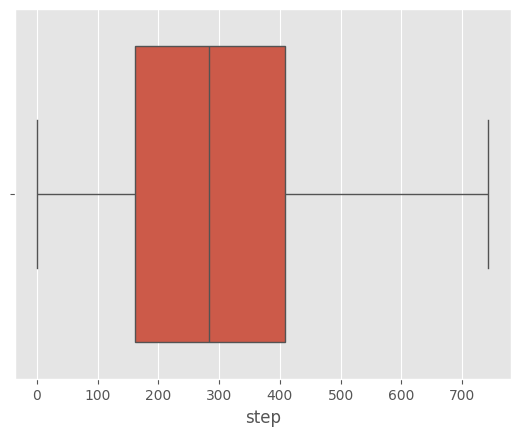

In [ ]:
sns.boxplot(data = onlinefraud, x = "step")

<Axes: xlabel='type', ylabel='count'>

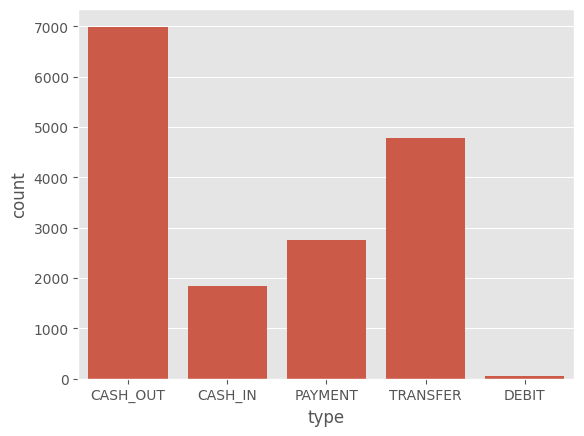

In [ ]:
sns.countplot(data = onlinefraud, x = "type")

<Axes: xlabel='amount', ylabel='Count'>

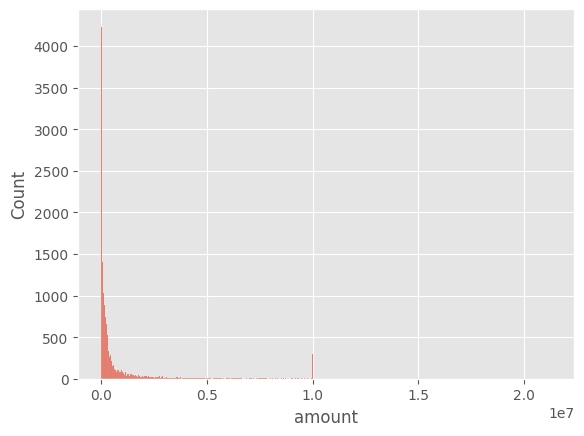

In [ ]:
sns.histplot(data = onlinefraud, x = "amount")

<Axes: xlabel='amount'>

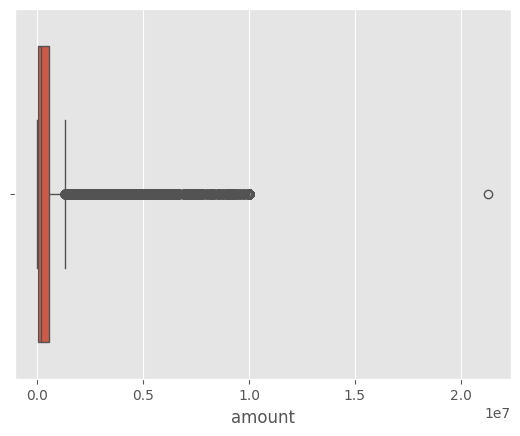

In [ ]:
sns.boxplot(data = onlinefraud, x = "amount")

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

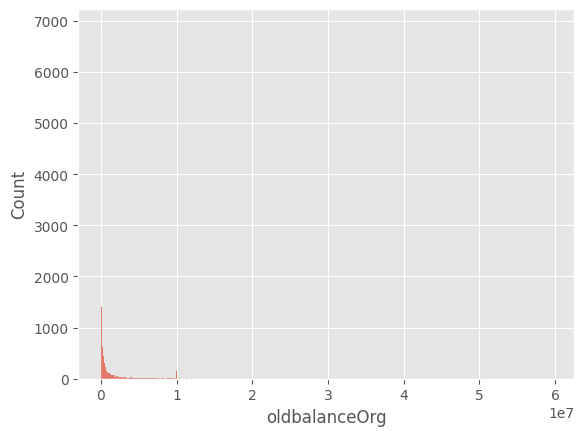

In [ ]:
sns.histplot(data = onlinefraud, x = "oldbalanceOrg")

In [ ]:
dataframe["nameDest"].value_counts()

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
...,...
M1470027725,1
M1330329251,1
M1784358659,1


<Axes: xlabel='oldbalanceDest'>

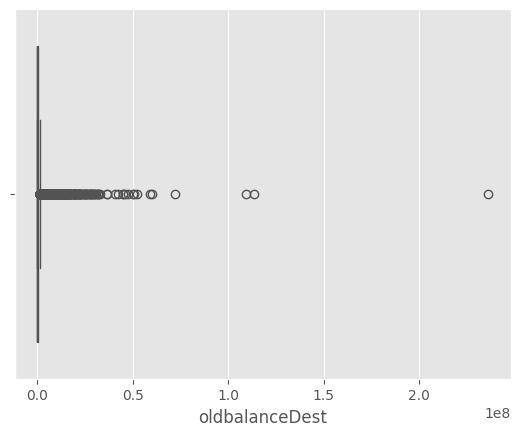

In [ ]:
sns.boxplot(data = onlinefraud, x = "oldbalanceDest")

<Axes: xlabel='newbalanceDest'>

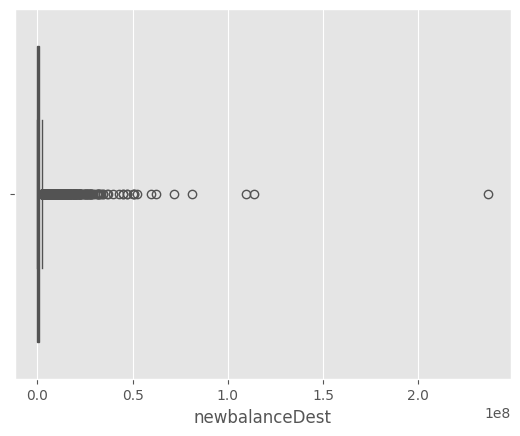

In [ ]:
sns.boxplot(data = onlinefraud, x = "newbalanceDest")

<Axes: xlabel='isFraud', ylabel='count'>

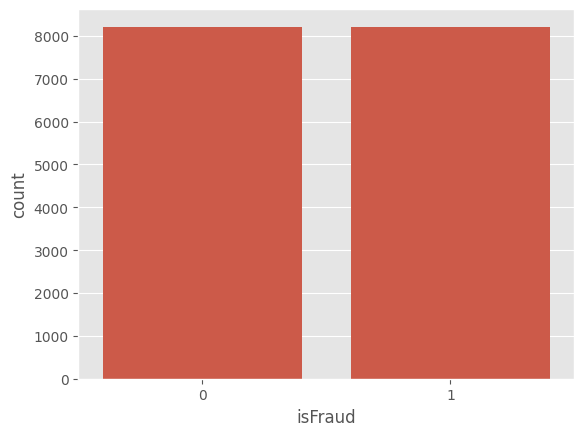

In [ ]:
sns.countplot(data = onlinefraud, x = "isFraud")

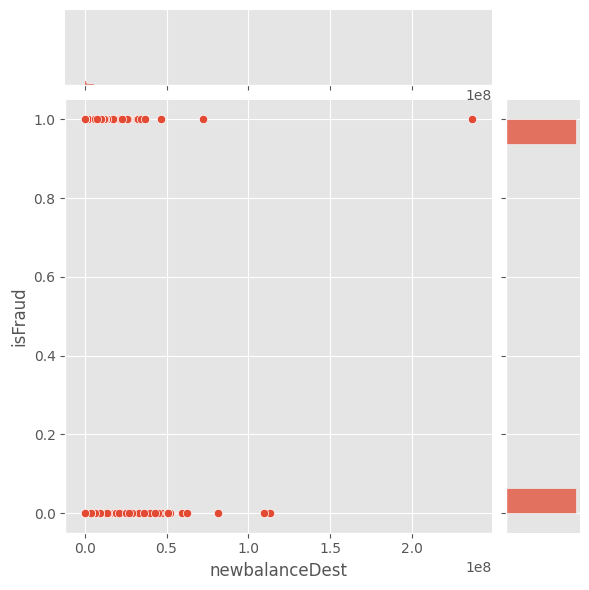

In [ ]:
sns.jointplot(data = onlinefraud, x = "newbalanceDest", y = "isFraud")

<Axes: xlabel='isFraud', ylabel='step'>

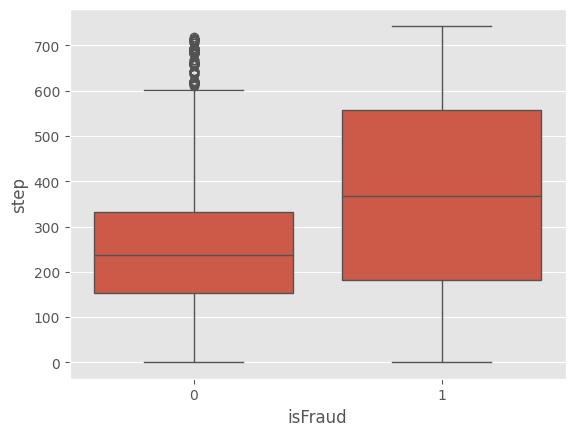

In [ ]:
sns.boxplot(data = onlinefraud, x = "isFraud", y = "step")

<Axes: xlabel='isFraud', ylabel='amount'>

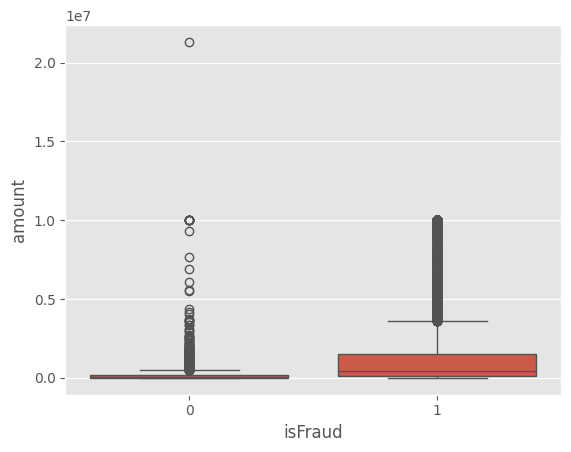

In [ ]:

sns.boxplot(data = onlinefraud, x = "isFraud", y = "amount")

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

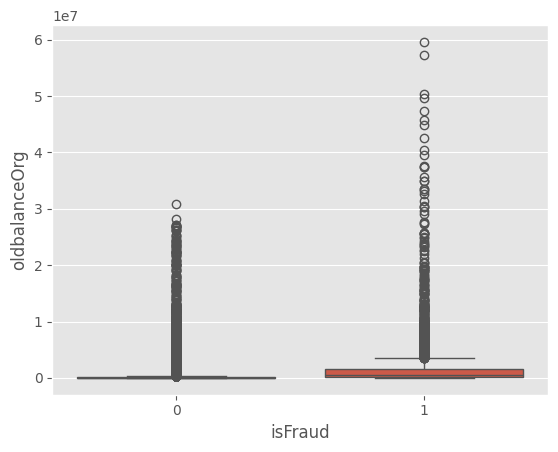

In [ ]:
sns.boxplot(data = onlinefraud, x = "isFraud", y = "oldbalanceOrg")

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

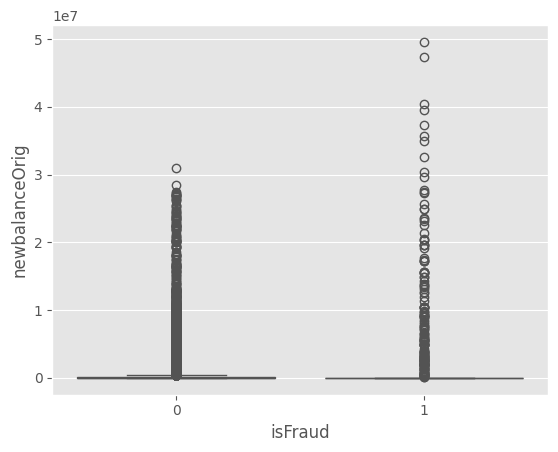

In [ ]:
sns.boxplot(data = onlinefraud, x = "isFraud", y ="newbalanceOrig")

In [ ]:
onlinefraud.describe(include="all")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,16426.000000,16426,1.642600e+04,16426,1.642600e+04,1.642600e+04,16426,1.642600e+04,1.642600e+04,16426.000000
unique,NaN,5,NaN,16426,NaN,NaN,16259,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1643761680,NaN,NaN,C185805228,NaN,NaN,NaN
freq,NaN,6995,NaN,1,NaN,NaN,3,NaN,NaN,NaN
mean,305.575551,NaN,8.221080e+05,NaN,1.262242e+06,5.451719e+05,NaN,8.151968e+05,1.247220e+06,0.500000
std,194.215992,NaN,1.854135e+06,NaN,3.308100e+06,2.582663e+06,NaN,3.405515e+06,3.811319e+06,0.500015
min,1.000000,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000
25%,161.000000,NaN,3.701904e+04,NaN,1.085025e+04,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000
50%,283.000000,NaN,1.740709e+05,NaN,1.198650e+05,0.000000e+00,NaN,0.000000e+00,1.261827e+05,0.500000
75%,409.000000,NaN,5.408181e+05,NaN,8.034413e+05,0.000000e+00,NaN,4.964110e+05,1.058532e+06,1.000000


In [ ]:
onlinefraud.shape

(16426, 10)

In [ ]:
onlinefraud.drop(["nameOrig", "nameDest"], axis=1, inplace=True)

In [ ]:
dataframe.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
onlinefraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6126444,540,CASH_OUT,100498.93,575167.23,474668.29,5915763.76,6016262.69,0,0
6305048,684,CASH_OUT,345559.35,29948.00,0.00,1357496.36,1703055.72,0,0
730294,37,CASH_OUT,254504.72,0.00,0.00,1806657.63,2061162.35,0,0
4462209,323,CASH_OUT,244349.92,56786.00,0.00,1501.80,245851.72,0,0
3398050,255,PAYMENT,2089.34,0.00,0.00,0.00,0.00,0,0


In [ ]:
onlinefraud.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1


In [ ]:
onlinefraud.isnull().any()

,0
step,False
type,False
amount,False
nameOrig,False
oldbalanceOrg,False
newbalanceOrig,False
nameDest,False
oldbalanceDest,False
newbalanceDest,False
isFraud,False


In [ ]:
onlinefraud.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
onlinefraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16426 entries, 4122256 to 6362619
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   nameOrig        16426 non-null  object 
 4   oldbalanceOrg   16426 non-null  float64
 5   newbalanceOrig  16426 non-null  float64
 6   nameDest        16426 non-null  object 
 7   oldbalanceDest  16426 non-null  float64
 8   newbalanceDest  16426 non-null  float64
 9   isFraud         16426 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 1.4+ MB


<Axes: xlabel='amount'>

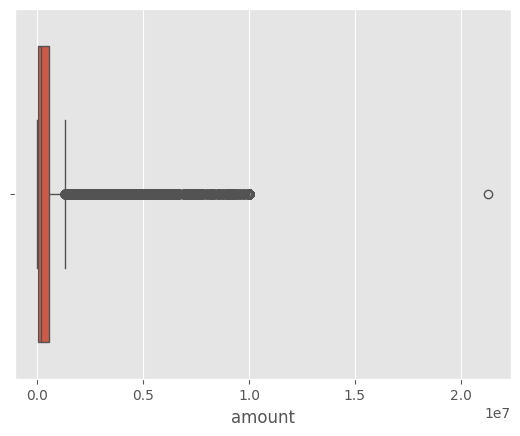

In [ ]:
sns.boxplot(x = onlinefraud["amount"])

**Handling Outliers**



In [ ]:
Q1 = onlinefraud['amount'].quantile(0.25)
Q3 = onlinefraud['amount'].quantile(0.75)

In [ ]:
interquartile = Q3 - Q1

upper_limit = Q3 + 1.5 * interquartile
lower_limit = Q1 - 1.5 * interquartile

In [ ]:
mean = onlinefraud['amount'].mean()

onlinefraud['amount'] = np.where(onlinefraud['amount'] > upper_limit, mean, onlinefraud['amount'])
onlinefraud['amount'] = np.where(onlinefraud['amount'] < lower_limit, mean, onlinefraud['amount'])

<Axes: xlabel='amount'>

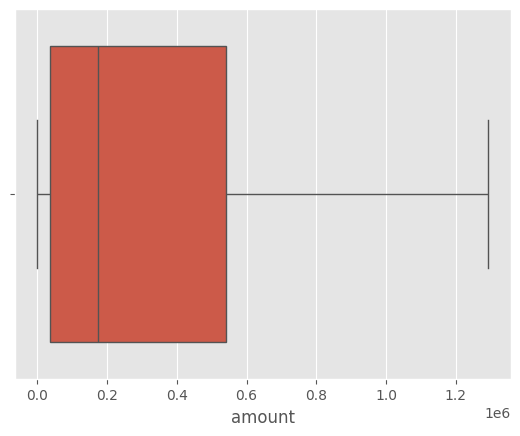

In [ ]:
sns.boxplot( x = onlinefraud["amount"])


<Axes: xlabel='oldbalanceOrg'>

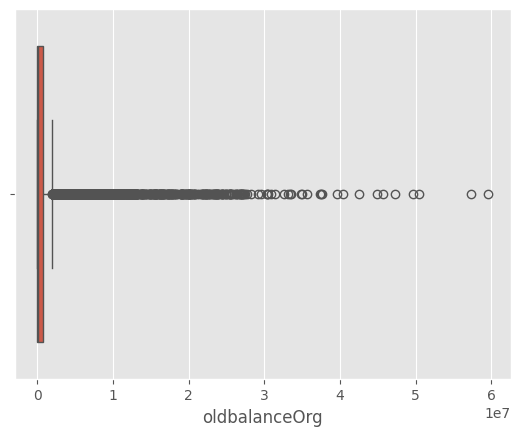

In [ ]:
sns.boxplot(x = onlinefraud["oldbalanceOrg"])

<Axes: xlabel='newbalanceOrig'>

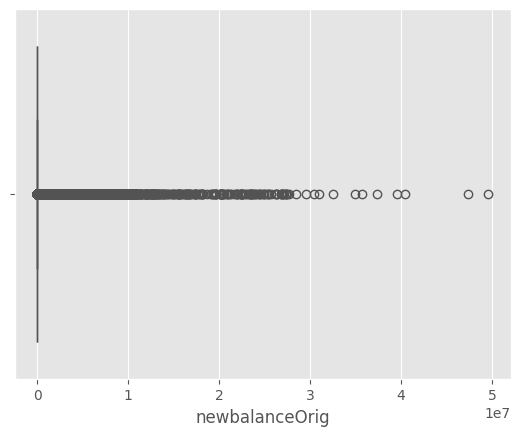

In [ ]:
sns.boxplot(x = onlinefraud["newbalanceOrig"])

In [ ]:
Q1 = onlinefraud['newbalanceOrig'].quantile(0.25)
Q3 = onlinefraud['newbalanceOrig'].quantile(0.75)

interquartile = Q3 - Q1

upper_limit = Q3 + 1.5 * interquartile
lower_limit = Q1 - 1.5 * interquartile

In [ ]:
mean = onlinefraud['newbalanceOrig'].mean()

onlinefraud['newbalanceOrig'] = np.where(onlinefraud['newbalanceOrig'] > upper_limit, mean, onlinefraud['newbalanceOrig'])
onlinefraud['newbalanceOrig'] = np.where(onlinefraud['newbalanceOrig'] < lower_limit, mean, onlinefraud['newbalanceOrig'])

<Axes: xlabel='newbalanceOrig'>

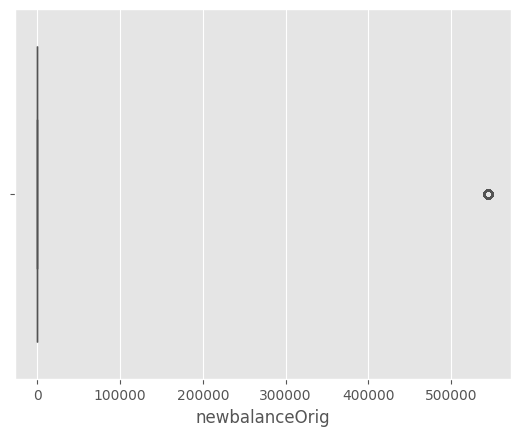

In [ ]:
sns.boxplot(x = onlinefraud["newbalanceOrig"])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()

onlinefraud["type"] = label.fit_transform(onlinefraud["type"])

In [ ]:
onlinefraud["type"].value_counts()

,count
type,
1,6995
4,4779
3,2761
0,1835
2,56


In [ ]:
label.classes_

array(['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'],
      dtype=object)

In [ ]:
map = dict(zip(label.classes_, range(len(label.classes_))))

In [ ]:
map

{'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}

In [ ]:
x = onlinefraud[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']]
y = onlinefraud["isFraud"]
x.head()

,type,amount,oldbalanceOrg,newbalanceOrig
4122256,1,168238.91,0.00,0.000000
4528255,0,290808.14,3129.00,545171.940915
491841,1,16697.18,367149.55,545171.940915
4694820,1,229854.47,259996.00,545171.940915
4979657,3,7564.20,5046.00,0.000000


In [ ]:
y.head()

,isFraud
4122256,0
4528255,0
491841,0
4694820,0
4979657,0


In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(13140, 4)
(3286, 4)
(3286,)
(13140,)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier()
ETC

ExtraTreesClassifier()

In [ ]:
ETC.fit(x_train,y_train)

ExtraTreesClassifier()

In [ ]:
y_test_predict = ETC.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict)
test_accuracy

0.9911746804625685

In [ ]:
y_train_predict = ETC.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict)
train_accuracy

0.9998477929984779

In [ ]:
pd.crosstab(y_test,y_test_predict)
print(classification_report (y_test,y_test_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1630
           1       0.99      1.00      0.99      1656

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



Confusion Matrix:
[[1609   21]
 [   8 1648]]


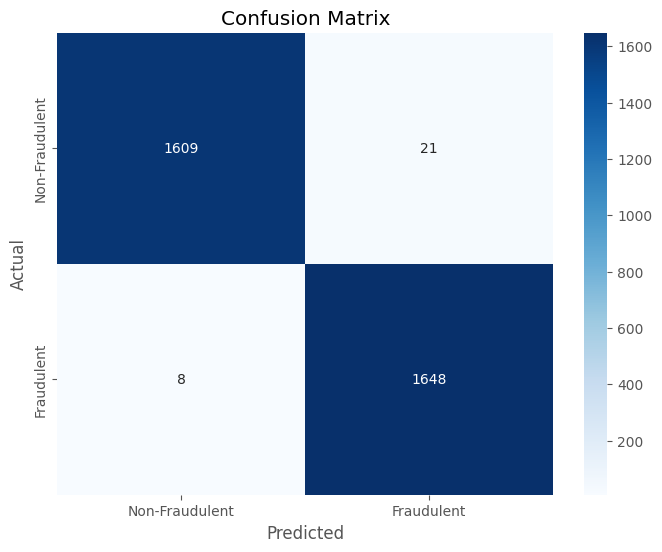

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_predict)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraudulent', 'Fraudulent'],
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pickle
pickle.dump(ETC,open('onlinepayment.pkl','wb'))